In [1]:
import csv
import numpy as np
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_0 = pd.read_csv("tao_aponte_01_catalogue_3963.csv") #read in dataset
data_0
data_0[('Redshift_Observed')]

0         1.179420
1         1.173460
2         1.182460
3         1.172880
4         1.173380
            ...   
827971    0.167463
827972    0.168558
827973    0.167888
827974    0.165895
827975    0.167698
Name: Redshift_Observed, Length: 827976, dtype: float64

In [3]:
data = data_0.sort_values('Redshift_Observed')
data[('Redshift_Observed')]

160095    0.014090
217670    0.014421
217671    0.014884
217668    0.014948
217674    0.015225
            ...   
482401    1.205740
382182    1.206080
577975    1.206100
578036    1.206300
578008    1.206380
Name: Redshift_Observed, Length: 827976, dtype: float64

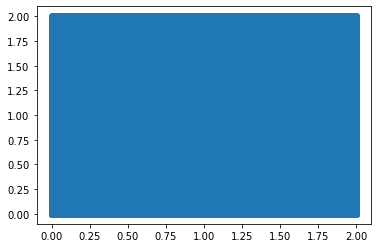

In [4]:
RA = data['Right_Ascension']
DEC = data['Declination']
plt.scatter(RA, DEC)

In [5]:
from astropy.cosmology import WMAP9 #import relevant cosmology (find way to automate this for each dataset)

In [6]:
#Estimate supernova rate per stellar mass using arbitrary parameters for now (added the multiplcation for the units - 10^10  solar mass)

try:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['Total_Stellar_Mass'])))*(10**10)/(10**10.5)
except:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['total_stellar_mass'])))*(10**10)/(10**10.5)
    
#supernovae_rate_per_stellar_mass

In [7]:
#Estimate supernova rate per star formation rate using arbitrary parameters for now

try:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['Total_Star_Formation_Rate'])
except:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['total_star_formation_rate'])
    
#supernovae_rate_per_star_formation_rate

In [8]:
#Estimate TDE rate 
blackholemass = np.array(data['Black_Hole_Mass'])*10**10

bh = np.zeros_like(blackholemass)
print(bh)

#print(blackholemass, bh)

bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))] = 1  
        
try:
    blackhole_rate_per_TDE_rate = ((1/10000))*(bh)
except:
    blackhole_rate_per_TDE_rate = ((1/10000))*(bh)
    
#blackhole_rate_per_TDE_rate
number_of_bh = len(bh[((blackholemass >= 10**6)&(blackholemass <= 10**7))])

[0. 0. 0. ... 0. 0. 0.]


In [9]:
#Insert supernova rates into tables

data.insert(loc=8,
          column='supernovae_rate_per_stellar_mass',
          value=supernovae_rate_per_stellar_mass)        

data.insert(loc=9,
          column='supernovae_rate_per_star_formation_rate',
          value=supernovae_rate_per_star_formation_rate)   

data.insert(loc=10,
          column='blackhole_rate_per_TDE_rate',
          value=blackhole_rate_per_TDE_rate)   

#data

In [10]:
#Finding solid angle for 2 square degree field (automate this for dataset)

from astropy import units as u
theta_RA  = 2 * 3600 * u.arcsec
theta_dec = 2 * 3600 * u.arcsec
Omega = (theta_RA * theta_dec).to(u.steradian)# get rid of unit
z = np.array(data['Redshift_Observed'])
print(Omega)

0.0012184696791468343 sr


In [82]:
#Some useful parameters

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
bins_z = np.linspace(np.min(z), np.max(z), 100)
binsize = (np.max(z) - np.min(z))/100
digitized_z = np.digitize(z, bins_z) #creates mask for each bin
print(bins_z)
#print(np.shape(bins_z))

[0.0140896  0.02613294 0.03817627 0.05021961 0.06226295 0.07430629
 0.08634962 0.09839296 0.1104363  0.12247964 0.13452297 0.14656631
 0.15860965 0.17065299 0.18269632 0.19473966 0.206783   0.21882634
 0.23086967 0.24291301 0.25495635 0.26699968 0.27904302 0.29108636
 0.3031297  0.31517303 0.32721637 0.33925971 0.35130305 0.36334638
 0.37538972 0.38743306 0.3994764  0.41151973 0.42356307 0.43560641
 0.44764975 0.45969308 0.47173642 0.48377976 0.49582309 0.50786643
 0.51990977 0.53195311 0.54399644 0.55603978 0.56808312 0.58012646
 0.59216979 0.60421313 0.61625647 0.62829981 0.64034314 0.65238648
 0.66442982 0.67647316 0.68851649 0.70055983 0.71260317 0.72464651
 0.73668984 0.74873318 0.76077652 0.77281985 0.78486319 0.79690653
 0.80894987 0.8209932  0.83303654 0.84507988 0.85712322 0.86916655
 0.88120989 0.89325323 0.90529657 0.9173399  0.92938324 0.94142658
 0.95346992 0.96551325 0.97755659 0.98959993 1.00164326 1.0136866
 1.02572994 1.03777328 1.04981661 1.06185995 1.07390329 1.08594

In [84]:
#Calculating Diff Comoving Volume

from scipy import integrate 

for i in range(0, len(bins_z)):
    LAMBDA1 = ((i)*(binsize)-1*(binsize))
    LAMBDA2 = (i*(binsize))                             
    #bin_means_z.append([z[digitized_z == i].mean()])
    #bin_means_tde.append([(tde[digitized_z == i].mean())/(d2-d1)])
comoving_volume = WMAP9.comoving_volume(bins_z)  #Give Volume in Mpc^3 Sr-1
#comoving_volume_unbinned = WMAP9.differential_comoving_volume(z)
#volume = (integrate.cumtrapz(comoving_volume, bins_z, binsize) * Omega )
bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
#print(bin_means_z)
#print(comoving_volume)
print(comoving_volume)
sum_co_vol = comoving_volume.sum()
print(sum_co_vol)
co_vol_all_sky = comoving_volume
#co_vol_all_sky_unbinned = comoving_volume_unbinned*4*np.pi
#print(co_vol_all_sky)

[9.39087294e+05 5.94505290e+06 1.83876378e+07 4.15234428e+07
 7.84990941e+07 1.32351656e+08 2.06009187e+08 3.02291423e+08
 4.23910605e+08 5.73472419e+08 7.53477053e+08 9.66320380e+08
 1.21429523e+09 1.49959276e+09 1.82430393e+09 2.19042108e+09
 2.59983952e+09 3.05435926e+09 3.55568680e+09 4.10543691e+09
 4.70513457e+09 5.35621689e+09 6.06003506e+09 6.81785639e+09
 7.63086631e+09 8.50017049e+09 9.42679689e+09 1.04116979e+10
 1.14557523e+10 1.25597676e+10 1.37244820e+10 1.49505666e+10
 1.62386274e+10 1.75892074e+10 1.90027889e+10 2.04797951e+10
 2.20205927e+10 2.36254935e+10 2.52947567e+10 2.70285905e+10
 2.88271544e+10 3.06905610e+10 3.26188777e+10 3.46121287e+10
 3.66702969e+10 3.87933254e+10 4.09811194e+10 4.32335479e+10
 4.55504453e+10 4.79316130e+10 5.03768210e+10 5.28858094e+10
 5.54582898e+10 5.80939470e+10 6.07924403e+10 6.35534045e+10
 6.63764518e+10 6.92611727e+10 7.22071375e+10 7.52138971e+10
 7.82809846e+10 8.14079162e+10 8.45941922e+10 8.78392984e+10
 9.11427066e+10 9.450387

Text(0, 0.5, 'Covariant Volume All Sky [Mpc^3]')

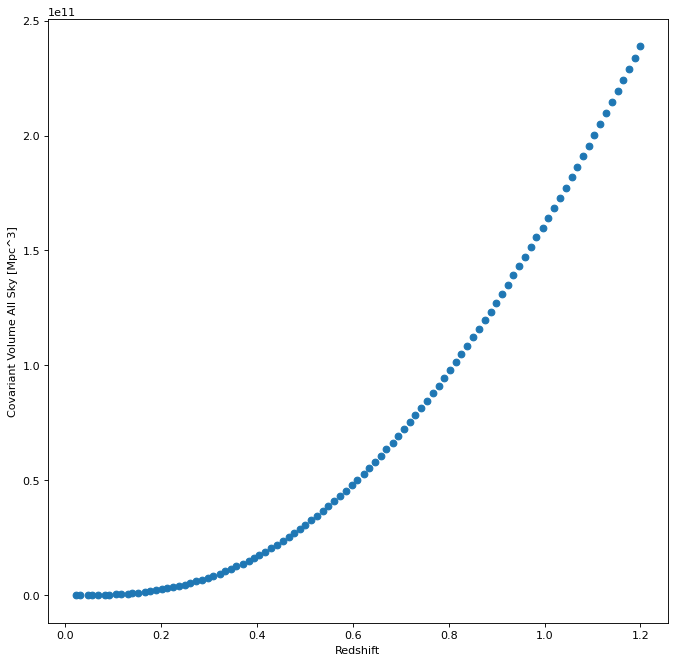

In [85]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, co_vol_all_sky)
plt.xlabel('Redshift')
plt.ylabel('Covariant Volume All Sky [Mpc^3]')

[0.0, 0.0004, 0.0008000000000000001, 0.0033, 0.009800000000000001, 0.0009, 0.0004, 0.0008, 0.009900000000000003, 0.0125, 0.0054, 0.0029, 0.0174, 0.0182, 0.013600000000000001, 0.0127, 0.0286, 0.0446, 0.0187, 0.0131, 0.0376, 0.032299999999999995, 0.017800000000000003, 0.026099999999999998, 0.017800000000000003, 0.03760000000000001, 0.0212, 0.013800000000000002, 0.0387, 0.047200000000000006, 0.05330000000000001, 0.10070000000000001, 0.06860000000000001, 0.048100000000000004, 0.0546, 0.041800000000000004, 0.0878, 0.11810000000000001, 0.1633, 0.13720000000000002, 0.0649, 0.09870000000000001, 0.1164, 0.07220000000000001, 0.0845, 0.15839999999999999, 0.088, 0.06140000000000001, 0.09620000000000001, 0.22260000000000002, 0.14390000000000003, 0.2268, 0.1807, 0.1328, 0.1416, 0.11320000000000001, 0.1487, 0.12260000000000001, 0.1516, 0.11420000000000001, 0.135, 0.1643, 0.1821, 0.20330000000000004, 0.1449, 0.13340000000000002, 0.221, 0.2173, 0.2811, 0.16460000000000002, 0.18319999999999997, 0.254200

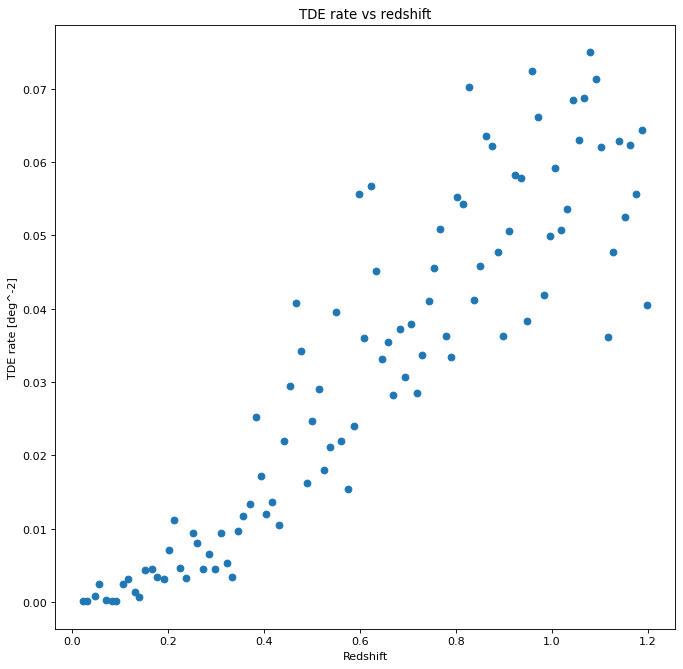

In [86]:
#TDE rate in deg^2

tde = data['blackhole_rate_per_TDE_rate']


bin_means_tde = [tde[digitized_z == i].sum() for i in range(0, len(bins_z))]
print(bin_means_tde)
#print(np.shape(bin_means_tde))

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_tde)/4)
plt.xlabel('Redshift')
plt.ylabel('TDE rate [deg^-2]')
plt.title('TDE rate vs redshift')

plt.show()

Text(0.5, 1.0, 'TDE rate vs redshift')

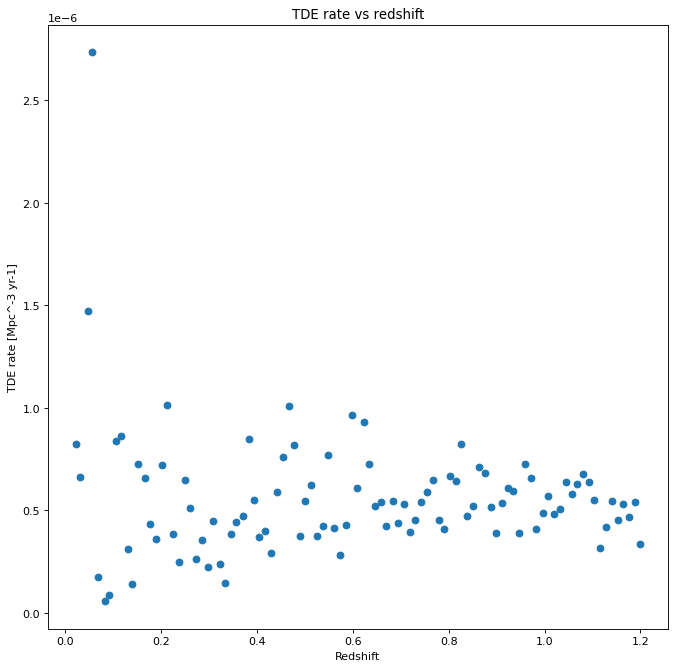

In [87]:
#TDE rate in Mpc^-3 yr-1
    
tde = data['blackhole_rate_per_TDE_rate']
#print(co_vol_all_sky)
#print(np.diff(co_vol_all_sky))
plt.figure(figsize=(10, 10), dpi=80)

tde_all_sky = np.array(bin_means_tde) * (41253/4)
difference = np.diff(co_vol_all_sky)
np.insert(difference, 0, 0)



plt.scatter(bin_means_z[1:], np.array(tde_all_sky)[1:]/np.array(np.diff(co_vol_all_sky)))
            
plt.xlabel('Redshift')
plt.ylabel('TDE rate [Mpc^-3 yr-1]')
plt.title('TDE rate vs redshift')


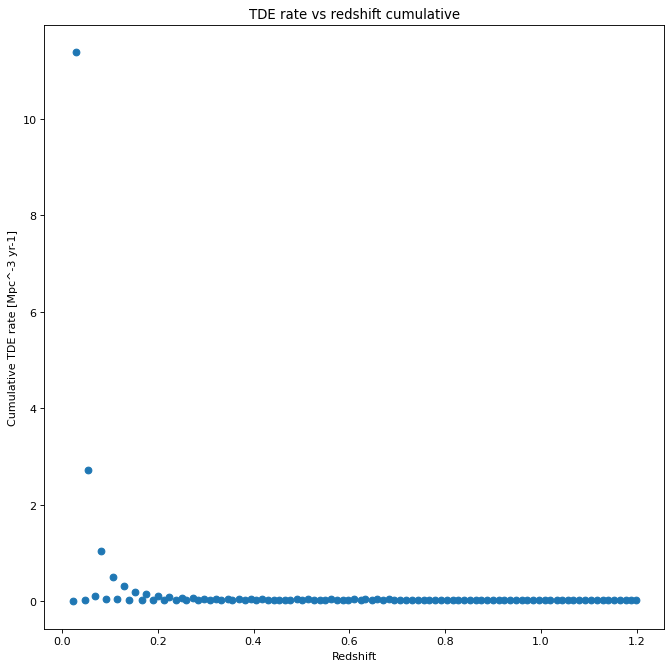

In [88]:
#Cumulative TDE rate in Mpc^-3 yr-1
#CHECK CUMULUTIVE GRAPH

tde = data['blackhole_rate_per_TDE_rate']
bins_z = np.linspace(np.min(z), np.max(z), 100)


bin_means_tde_cum = [0]
    
for i in range(0, len(bins_z)):
    bin_means_tde_cum.append(bin_means_tde_cum[i-1] + bin_means_tde[i-1])
       
bin_means_tde_cum = np.array(bin_means_tde_cum[1:]) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, number_of_bh*(np.array(bin_means_tde_cum)/np.array(co_vol_all_sky)))
plt.xlabel('Redshift')
plt.ylabel('Cumulative TDE rate [Mpc^-3 yr-1]')
plt.title('TDE rate vs redshift cumulative')

plt.show()

(100,)


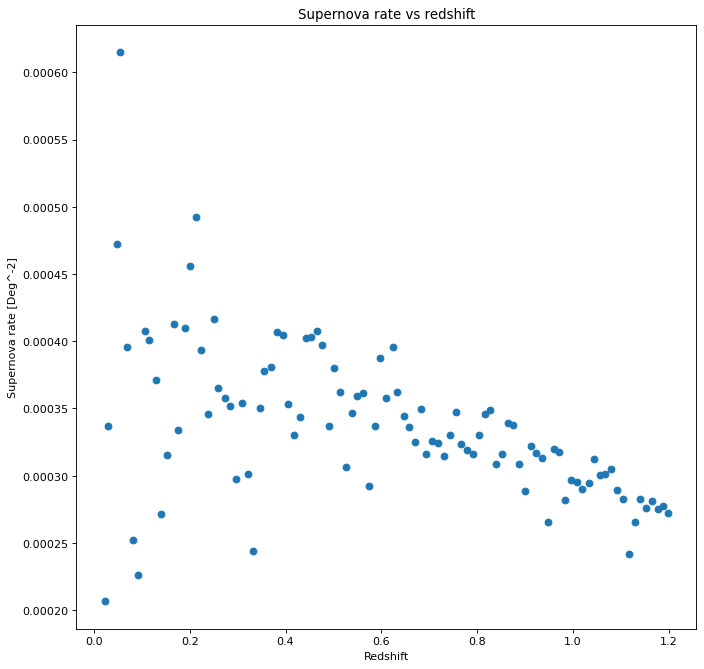

In [17]:
#Supernova rate per stellar mass in deg^2

sm = data['supernovae_rate_per_stellar_mass']

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(0, len(bins_z))] 
print(np.shape(bin_means_sm))
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sm)/4)
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [Deg^-2]')
plt.title('Supernova rate vs redshift')

plt.show()

(100,)


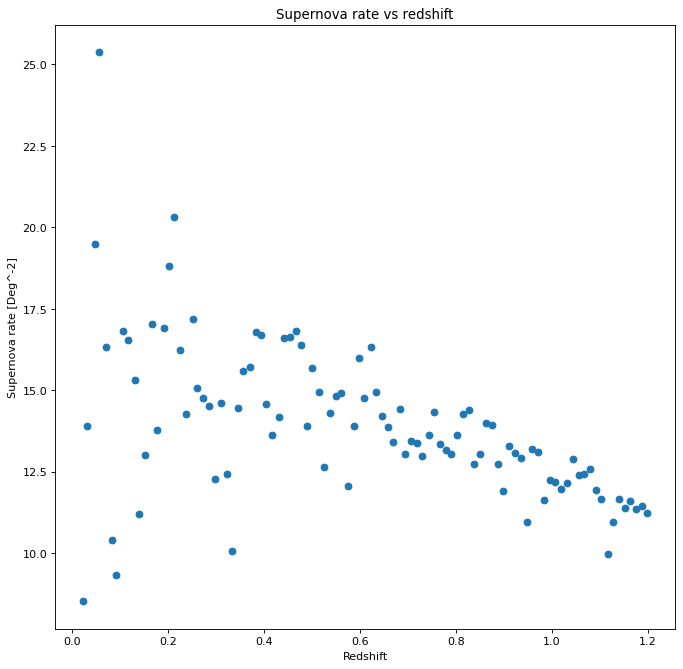

In [18]:
#Supernova rate per stellar mass in 41253 deg^2

sm = data['supernovae_rate_per_stellar_mass']

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(0, len(bins_z))] 
print(np.shape(bin_means_sm))
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sm)*(41253/4))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [Deg^-2]')
plt.title('Supernova rate vs redshift')

plt.show()

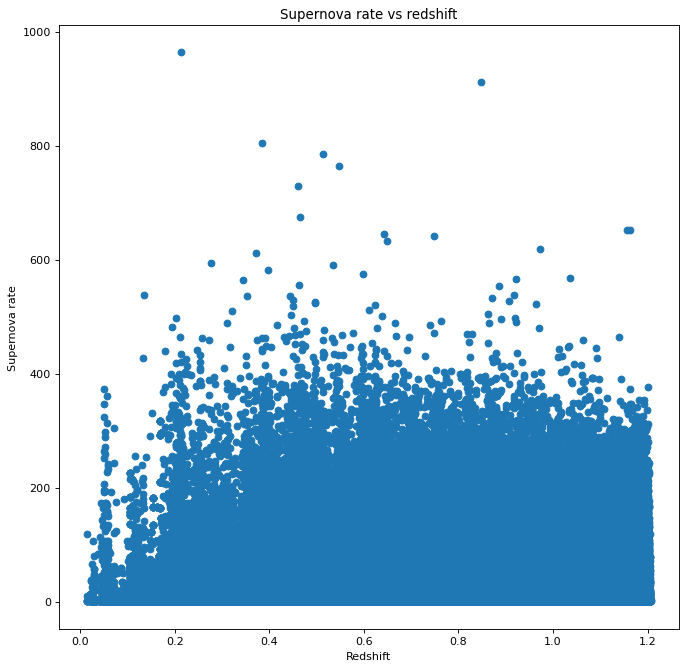

In [19]:
#Supernova rate per stellar mass in all sky

sm = data['supernovae_rate_per_stellar_mass']

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(z, sm*(41253/4))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate')
plt.title('Supernova rate vs redshift')

plt.show()

997
326.25405823276634
1.1941
1.17288


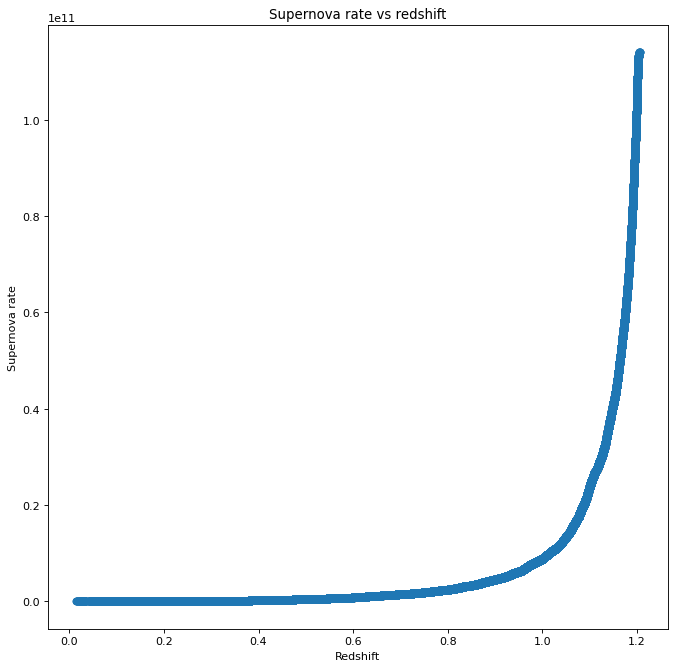

In [20]:
#Cumulutive Supernova rate per stellar mass in all sky

#MAKE SURE TO CHECK THAT SM_CUM IS INDEXING FROM LOW TO HIGH REDSHIFT
 
sm = data['supernovae_rate_per_stellar_mass']
sm = np.array(sm)
sm = np.sort(sm)

sm_cum = [0]

for i in range(0, len(z)):
    sm_cum.append(sm_cum[i] + sm[i])
       
sm_cum = np.array(sm_cum[1:]) * (41253/4)


plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(z, sm_cum*(41253/4))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate')
plt.title('Supernova rate vs redshift')

result = np.where(z > 0.1)
if len(result) > 0 and len(result[0]) > 0:
    print(result[0][0])

print(sm_cum[(result[0][0])])
print(z[(result[0][0])])
print(z[3])

plt.show()

[3.16227766e-05 3.16230928e-05 3.16230928e-05 ... 7.80367907e-02
 8.84359408e-02 9.34364505e-02]


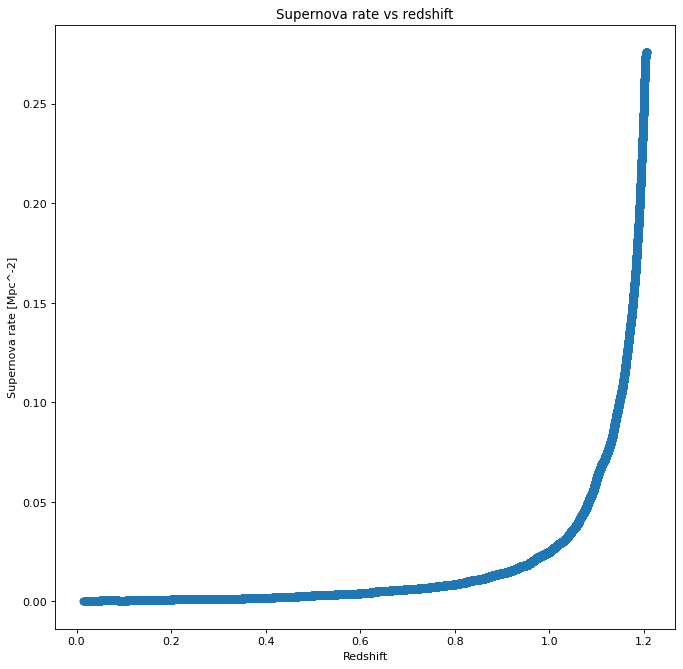

In [21]:
#Cumulutive Supernova rate per stellar mass in all sky

sm = data['supernovae_rate_per_stellar_mass']
sm = np.array(sm)
sm = np.sort(sm)
print(sm)

sm_cum = [0]

for i in range(0, len(z)):
    sm_cum.append(sm_cum[i] + sm[i])
       
sm_cum = np.array(sm_cum[1:]) * (41253/4)


plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(z, sm_cum*(41253/4)/np.array(co_vol_all_sky_unbinned))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [Mpc^-2]')
plt.title('Supernova rate vs redshift')

plt.show()

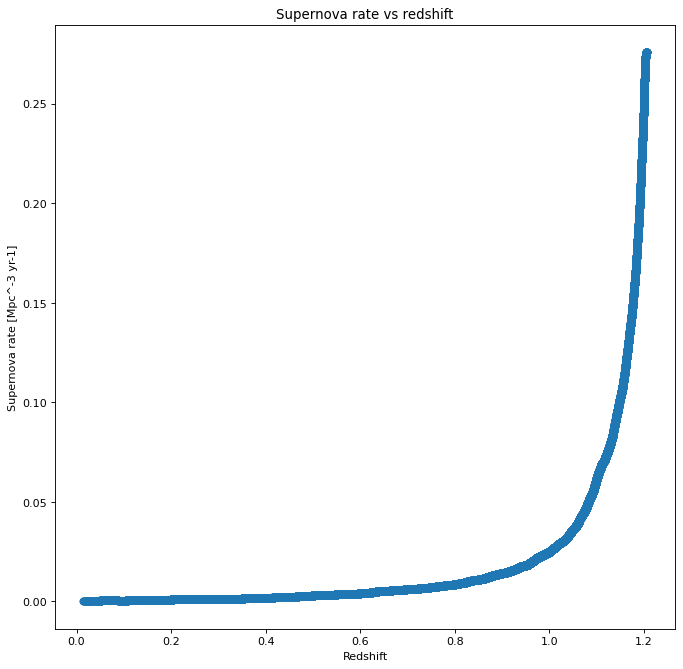

In [22]:
#Supernova rate per stellar mass in Mpc^-3 yr-1

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
sm = data['supernovae_rate_per_stellar_mass']
bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(0, len(bins_z))] 

sm_all_sky = np.array(bin_means_sm) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(z, sm_cum*(41253/4)/np.array(co_vol_all_sky_unbinned))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate [Mpc^-3 yr-1]')
plt.title('Supernova rate vs redshift')

plt.show()

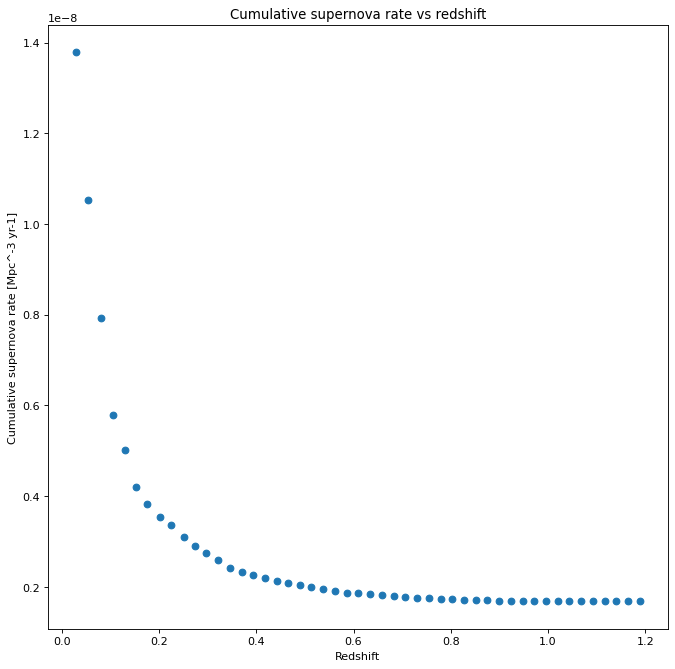

In [23]:
#Cumulative Supernova rate rate in Mpc^-3 yr-1

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
sm = data['supernovae_rate_per_stellar_mass']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(0, len(bins_z))] 

bin_means_sm_cum = [0]
    
for i in range(0, len(bins_z)):
    bin_means_sm_cum.append(bin_means_sm_cum[i-1] + bin_means_sm[i-1])
       
bin_means_sm_cum = np.array(bin_means_sm_cum[1:]) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, (np.array(bin_means_sm_cum))/np.array(co_vol_all_sky))
plt.xlabel('Redshift')
plt.ylabel('Cumulative supernova rate [Mpc^-3 yr-1]')
plt.title('Cumulative supernova rate vs redshift')

plt.show()

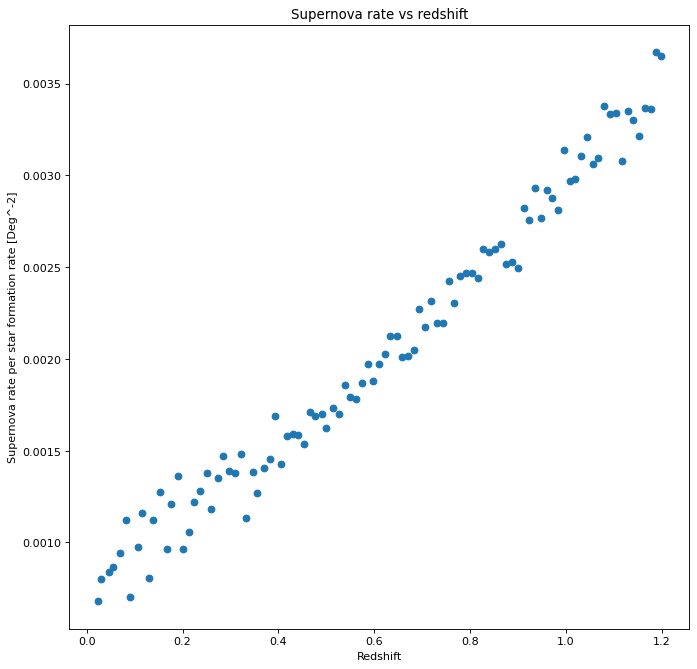

In [24]:
#Supernova rate per star formation rate in deg^2

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(0, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sfr)/4)
plt.xlabel('Redshift')
plt.ylabel('Supernova rate per star formation rate [Deg^-2]')
plt.title('Supernova rate vs redshift')

plt.show()


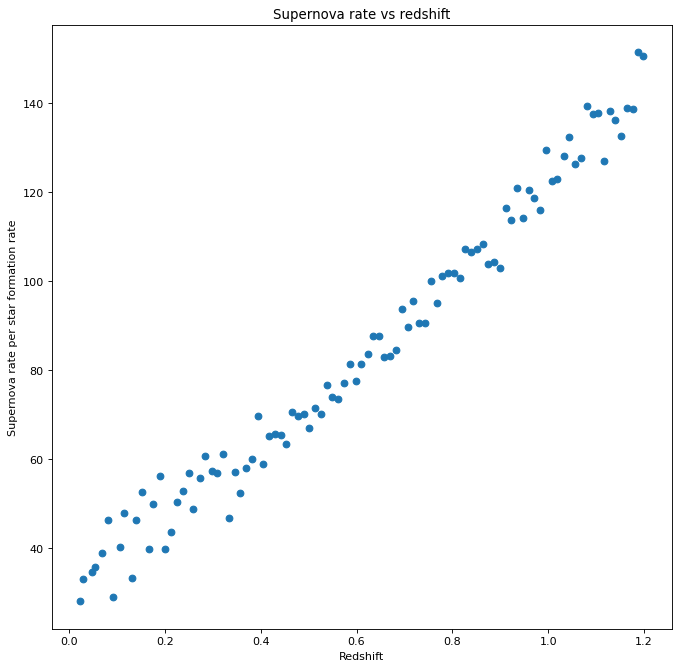

In [25]:
#Supernova rate per star formation rate all sky

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(0, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_sfr)*(41253/4))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate per star formation rate')
plt.title('Supernova rate vs redshift')

plt.show()

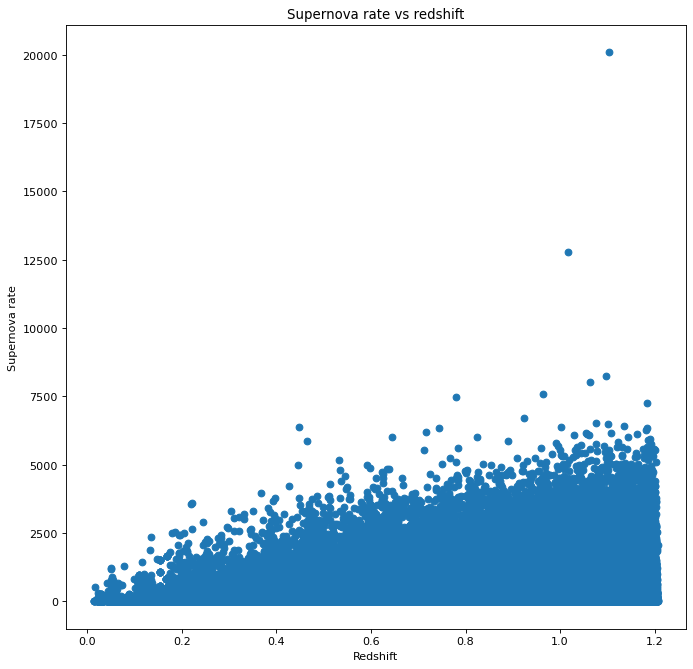

In [26]:
#Supernova rate per star formation rate in all sky

sfr = data['supernovae_rate_per_star_formation_rate']

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(z, sfr*(41253/4))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate')
plt.title('Supernova rate vs redshift')

plt.show()

997
0.0
1.1941
1.17288


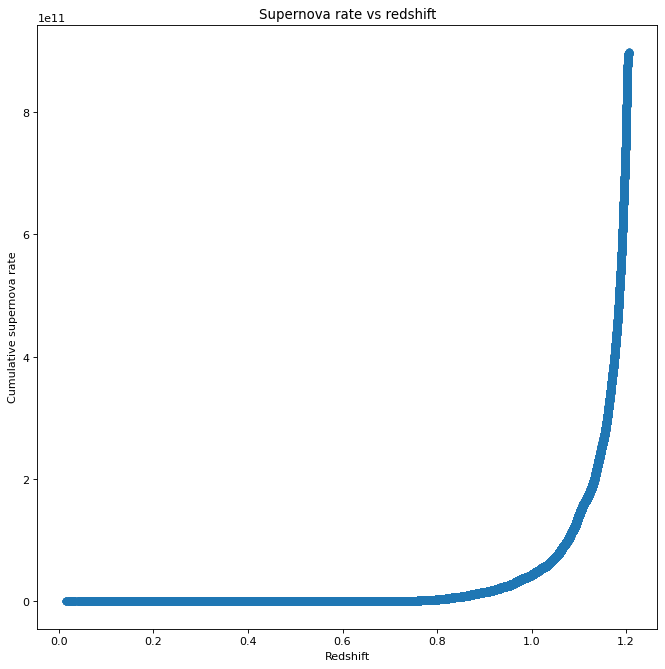

In [27]:
#Cumulutive Supernova rate per stellar mass in all sky

#MAKE SURE TO CHECK THAT SM_CUM IS INDEXING FROM LOW TO HIGH REDSHIFT
 
sfr = data['supernovae_rate_per_star_formation_rate']
sfr = np.array(sfr)
sfr = np.sort(sfr)

sfr_cum = [0]

for i in range(0, len(z)):
    sfr_cum.append(sfr_cum[i] + sfr[i])
       
sfr_cum = np.array(sfr_cum[1:]) * (41253/4)


plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(z, sfr_cum*(41253/4))
plt.xlabel('Redshift')
plt.ylabel('Cumulative supernova rate')
plt.title('Supernova rate vs redshift')

result = np.where(z > 0.1)
if len(result) > 0 and len(result[0]) > 0:
    print(result[0][0])

print(sfr_cum[(result[0][0])])
print(z[(result[0][0])])
print(z[3])

plt.show()

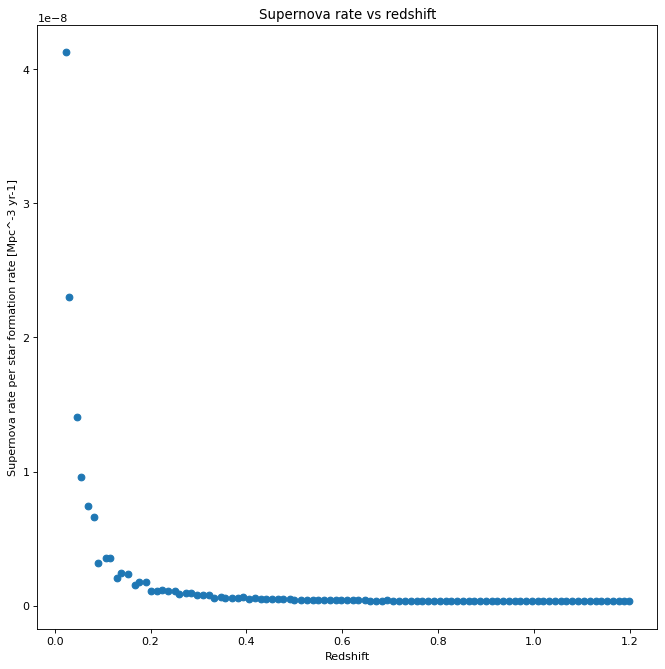

In [28]:
#Supernova rate per star formation rate in Mpc^-3

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(0, len(bins_z))]

sfr_all_sky = np.array(bin_means_sfr) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(sfr_all_sky)/np.array(co_vol_all_sky))
plt.xlabel('Redshift')
plt.ylabel('Supernova rate per star formation rate [Mpc^-3 yr-1]')
plt.title('Supernova rate vs redshift')

plt.show()

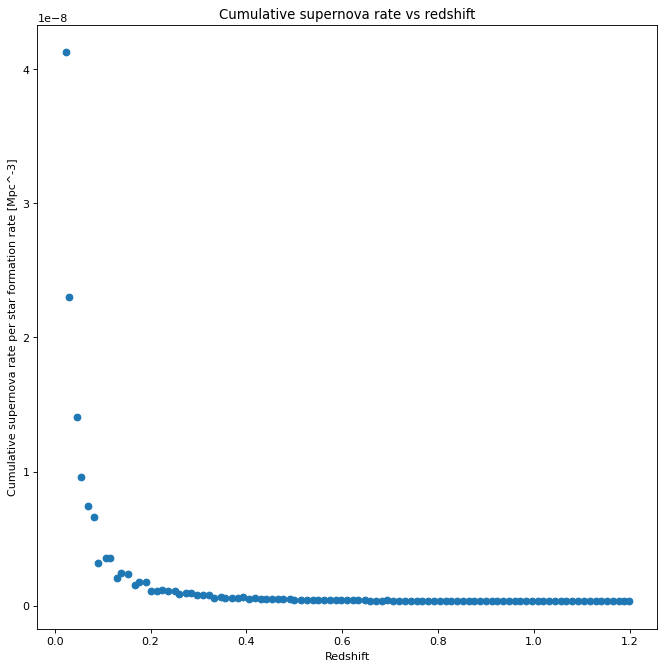

In [29]:
#Supernova rate per star formation rate in Mpc^-3

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(0, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(0, len(bins_z))]

bin_means_sfr_cum = [0]
    
for i in range(0, len(bins_z)):
    bin_means_sfr_cum.append(bin_means_sfr_cum[i-1] + bin_means_sfr[i-1])
       
bin_means_sfr_cum = np.array(bin_means_sfr_cum[1:]) * (41253/4)

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(sfr_all_sky)/np.array(co_vol_all_sky))
plt.xlabel('Redshift')
plt.ylabel('Cumulative supernova rate per star formation rate [Mpc^-3]')
plt.title('Cumulative supernova rate vs redshift')

plt.show()

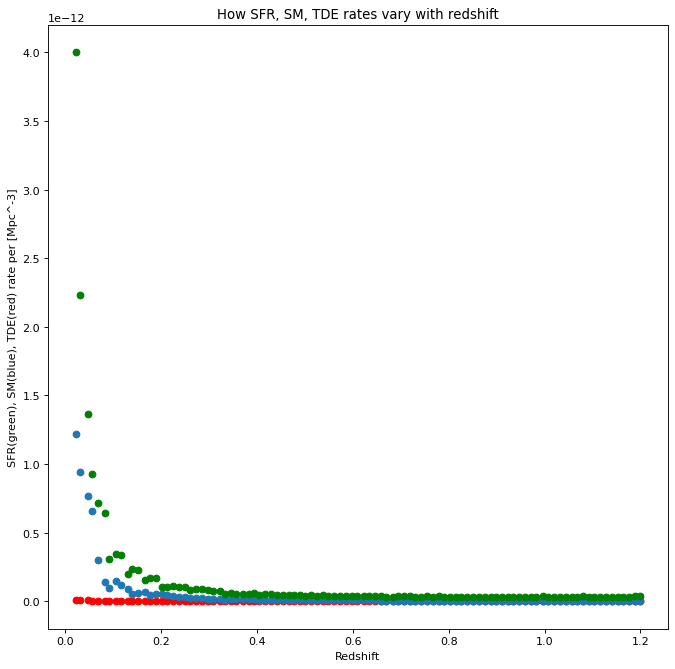

In [30]:
#Plot of all three in Mpc^-3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_tde)/np.array(co_vol_all_sky), color='r')
plt.scatter(bin_means_z, np.array(bin_means_sm)/np.array(co_vol_all_sky))
plt.scatter(bin_means_z, np.array(bin_means_sfr)/np.array(co_vol_all_sky), color='g')
plt.xlabel('Redshift')
plt.ylabel('SFR(green), SM(blue), TDE(red) rate per [Mpc^-3]')
plt.title('How SFR, SM, TDE rates vary with redshift')

plt.show()

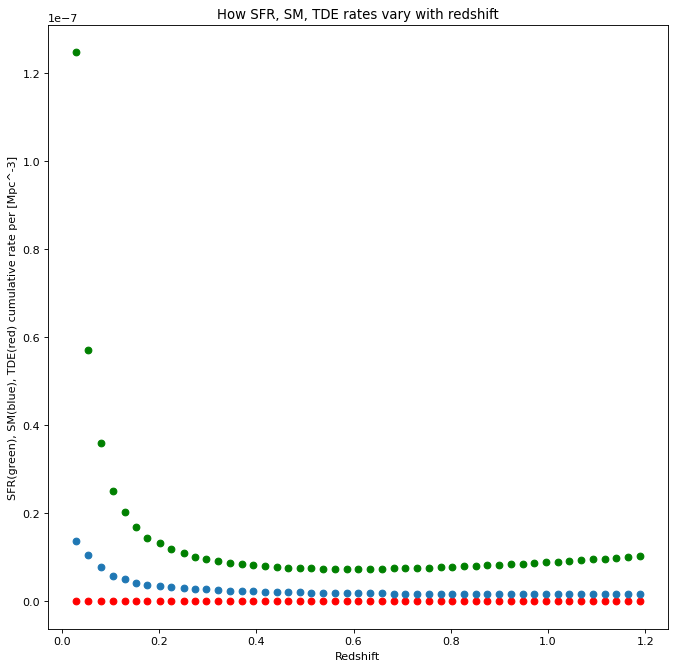

In [31]:
#Plot of all three cumulative in Mpc^-3

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, np.array(bin_means_tde_cum)/np.array(co_vol_all_sky), color='r')
plt.scatter(bin_means_z, np.array(bin_means_sm_cum)/np.array(co_vol_all_sky))
plt.scatter(bin_means_z, np.array(bin_means_sfr_cum)/np.array(co_vol_all_sky), color='g')
plt.xlabel('Redshift')
plt.ylabel('SFR(green), SM(blue), TDE(red) cumulative rate per [Mpc^-3]')
plt.title('How SFR, SM, TDE rates vary with redshift')

plt.show()